In [1]:
#Uploading the Dataset and converting it into a DataFrame
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [2]:
#Importing relevant libraries
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from statistics import mean, stdev
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = df.values
                       
features = ['ejection_fraction','serum_creatinine','time']
x = df[features]
y = df['DEATH_EVENT']
y = np.ravel(y)

# Normalizing the Data

In [4]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Introducing Stratified K - Fold Cross Validation

In [5]:
skf = StratifiedKFold(n_splits=5)

# SVM - RBF Kernel

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

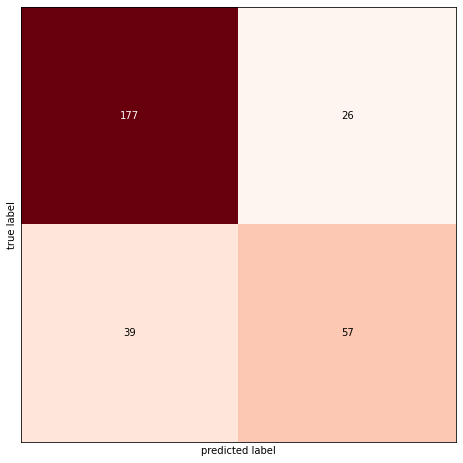

In [6]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  support_vector_machine = SVC()
  support_vector_machine.fit(x_train,y_train)
  target_prediction = support_vector_machine.predict(x_test)
  lst_accu_stratified.append(support_vector_machine.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

In [7]:
print('List of possible accuracies:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracies: [0.7333333333333333, 0.9, 0.85, 0.75, 0.6779661016949152]

Maximum Accuracy that can be obtained from this model is: 90.0 %

Minimum Accuracy: 67.79661016949152 %

Overall Accuracy: 78.22598870056497 %

Standard Deviation is: 0.09050298162867156


# SVM - Linear Kernel

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

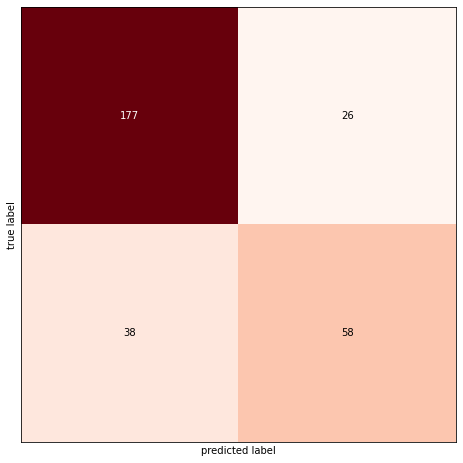

In [8]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  support_vector_machine = SVC(kernel = "linear")
  support_vector_machine.fit(x_train,y_train)
  target_prediction = support_vector_machine.predict(x_test)
  lst_accu_stratified.append(support_vector_machine.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

In [9]:
print('List of possible accuracies:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracies: [0.65, 0.85, 0.95, 0.8, 0.6779661016949152]

Maximum Accuracy that can be obtained from this model is: 95.0 %

Minimum Accuracy: 65.0 %

Overall Accuracy: 78.5593220338983 %

Standard Deviation is: 0.12384919845777191


# SVM - Polynomial Kernel

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

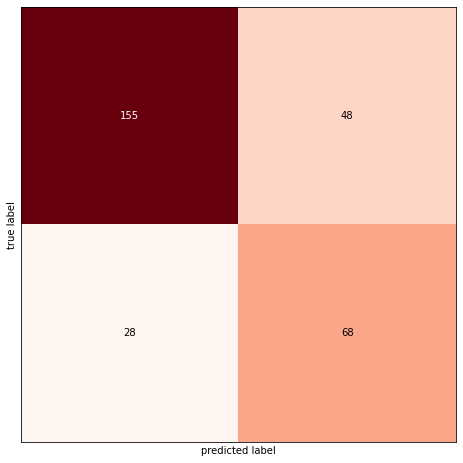

In [10]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  support_vector_machine = SVC(kernel = "poly")
  support_vector_machine.fit(x_train,y_train)
  target_prediction = support_vector_machine.predict(x_test)
  lst_accu_stratified.append(support_vector_machine.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

# Logistic Regression

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

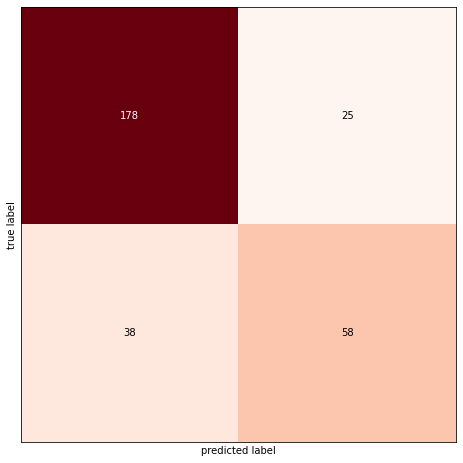

In [11]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = LogisticRegression(random_state=1).fit(x_train, y_train)
  target_prediction = clf.predict(x_test)
  lst_accu_stratified.append(clf.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

In [12]:
print('List of possible accuracies:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracies: [0.65, 0.8666666666666667, 0.95, 0.8, 0.6779661016949152]

Maximum Accuracy that can be obtained from this model is: 95.0 %

Minimum Accuracy: 65.0 %

Overall Accuracy: 78.89265536723164 %

Standard Deviation is: 0.1262176797363584


# K-Nearest Neighbors

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

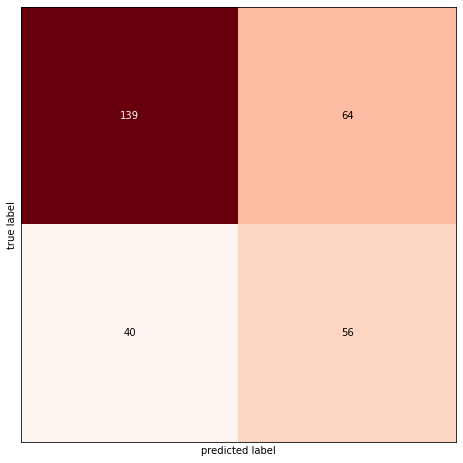

In [13]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(x_train, y_train)
  target_prediction = neigh.predict(x_test)
  lst_accu_stratified.append(neigh.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

In [14]:
print('List of possible accuracies:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracies: [0.6166666666666667, 0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.6779661016949152]

Maximum Accuracy that can be obtained from this model is: 67.79661016949152 %

Minimum Accuracy: 61.66666666666667 %

Overall Accuracy: 65.22598870056497 %

Standard Deviation is: 0.025985629884915526


# Adaptive Boosting

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

<Figure size 432x288 with 0 Axes>

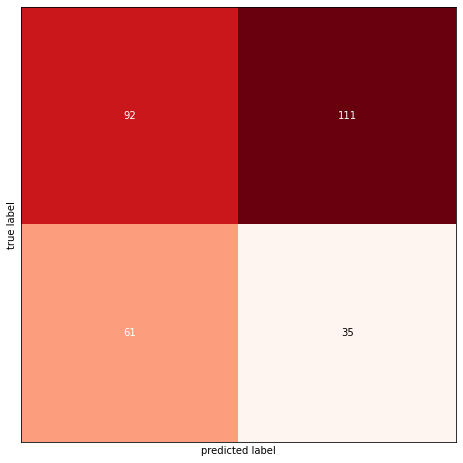

In [15]:
#Driver code: We perform cross validation, and print the confusion matrix
lst_accu_stratified = []
cm_sum = []
StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x_scaled[train_index], x_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = AdaBoostClassifier(n_estimators=100, random_state=0)
  clf.fit(x_train, y_train)
  target_prediction = clf.predict(x_test)
  lst_accu_stratified.append(clf.score(x_test, y_test))
  cm = confusion_matrix(y_test, target_prediction)
  cm_sum.append(cm)
m = sum(cm_sum)
plt.figure()
plot_confusion_matrix(m, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)

In [16]:
print('List of possible accuracies:', lst_accu_stratified)
print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracies: [0.45, 0.31666666666666665, 0.48333333333333334, 0.18333333333333332, 0.6949152542372882]

Maximum Accuracy that can be obtained from this model is: 69.49152542372882 %

Minimum Accuracy: 18.333333333333332 %

Overall Accuracy: 42.56497175141243 %

Standard Deviation is: 0.1917151535953834
